In [0]:
from google.colab import drive

import os

In [0]:
# Mount Google drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
DATA_DIR = '/drive/My Drive/cs143_final/emotion_data'

In [0]:
os.chdir(DATA_DIR)

In [0]:
os.listdir()

['validation_data.npy',
 'train_label.npy',
 'train_data.npy',
 'validation_label.npy',
 'testing_data.npy',
 'testing_label.npy',
 'emotion_detect_without_augumentation.data-00001-of-00002',
 'emotion_detect_without_augumentation.data-00000-of-00002',
 'emotion_detect_without_augumentation.index',
 'checkpoint',
 'weights',
 'play_weights2',
 'aug_weights1',
 'aug_weights2',
 'aug_weights3',
 'aug_weights_hw']

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

import matplotlib.pyplot as plt


In [0]:
# get data
train_data = np.load('train_data.npy').astype(np.float64)
train_label = np.load('train_label.npy')

validation_data = np.load('validation_data.npy').astype(np.float64)
validation_label = np.load('validation_label.npy')

testing_data = np.load('testing_data.npy').astype(np.float64)
testing_label = np.load('testing_label.npy')

In [0]:
datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
    #horizontal_flip=True
    )

In [0]:
# datagen.fit(train_data)

In [0]:
train_dataset = datagen.flow(train_data, train_label, batch_size=32)
validation_dataset = datagen.flow(validation_data, validation_label, batch_size=32)

In [0]:
model = models.Sequential()

model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(48,48,1)))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       2

In [0]:
model.compile(optimizer=Adam(lr=0.0001, decay=1e-6),
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# history = model.fit(train_dataset, epochs=25, 
#                     validation_data=(validation_data, validation_label))
history = model.fit_generator(train_dataset,
                    steps_per_epoch=len(train_data) / 32, 
                    validation_data=validation_dataset,
                    validation_steps=len(validation_data)/32,
                    epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
898/897 [==============================] - 14s 16ms/step - loss: 1.8428 - accuracy: 0.2365 - val_loss: 1.8404 - val_accuracy: 0.2449
Epoch 2/50
898/897 [==============================] - 14s 15ms/step - loss: 1.8136 - accuracy: 0.2458 - val_loss: 1.7824 - val_accuracy: 0.2452
Epoch 3/50
898/897 [==============================] - 14s 15ms/step - loss: 1.7500 - accuracy: 0.2794 - val_loss: 1.6938 - val_accuracy: 0.3279
Epoch 4/50
898/897 [==============================] - 14s 15ms/step - loss: 1.6591 - accuracy: 0.3414 - val_loss: 1.5535 - val_accuracy: 0.3918
Epoch 5/50
898/897 [==============================] - 14s 15ms/step - loss: 1.5662 - accuracy: 0.3927 - val_loss: 1.4716 - val_accuracy: 0.4508
Epoch 6/50
898/897 [==============================] - 14s 15ms/step - loss: 1.5046 - accuracy: 0.4181 - val_loss: 1.4211 - val_accuracy: 0.4634
Epoch 7/50
898/897 [==============================] - 14s 15

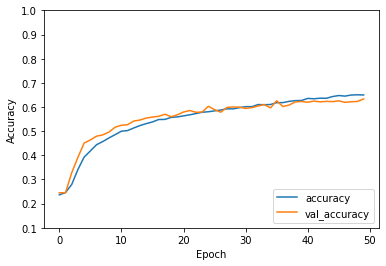

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

In [0]:
test_loss, test_acc = model.evaluate(testing_data,  testing_label, verbose=2)

113/113 - 0s - loss: 67.9105 - accuracy: 0.4661


In [0]:

test_pred = model.predict(testing_data)

from collections import Counter
Counter(np.argmax(test_pred, axis=1))

Counter({0: 439, 1: 26, 2: 1018, 3: 755, 4: 196, 5: 719, 6: 436})

In [0]:
 # model.save_weights('./aug_weights_hw/emotion_detect_without_augumentation')